---
---

# Loan Default Prediction
---
---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 1 - Context</h1>

<h2 style='font-size: 18px; font-weight: bold'>Problem Definition</h2>
<p style='text-align: justify'>As a data scientist employed by Förde Sparkasse, I propose developing a machine-learning model to predict the likelihood of a customer defaulting on their loan. This model will help the identify potential defaulters with the help of binary classification based on various factors such as income, loan amount, employment record, credit history, etc.</p>

<h2 style='font-size: 18px; font-weight: bold'>Value Proposition</h2>
<p style='text-align: justify'>A machine-learning model has signiificant value for the bank:

1. By identifying high-risk applicants, the bank can reduce financial losses due to defaults & improving the profitability of the lending portfolio.

2. A successful working model can automate parts of the loan approval process saving time of the bank employees and providing informed and consistent decisions. It also enables better risk management by flagging high risk loans early in the process.</p>

<h2 style='font-size: 18px; font-weight: bold'>Quality Criteria</h2>
<p style='text-align: justify'> To evaluate the model's performance, the following quality criteria will be analysed:

1. **Accuracy**: Accuracy is a simple and intuitive metric to understand the model's overall performance. It measures the percentage of correct predictions made by the model, both true positive and true negatives.

2. **F1-Score**: In case of an imbalanced datasets, accuracy alone can be misleading. Here, F1-Score is chosen to balance precision and recall. This metric is useful to ensure that the model performs well in identifying both false positives and false negatives.</p>

</div>

---
---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 2 - The Data</h1>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Reference</h2>
<p>

* Source: https://www.kaggle.com/datasets/nikhil1e9/loan-default/data
* Author: Nikhil
* License: CC0: Public Domain
* Purpose: This dataset is used for training a classification model to predict the loan status of a loan applicant.
</p>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Suitability</h2>
<p style='text-align: justify'> This dataset is well-suited for the task of developing a classification model to predict the loan status of an applicant as it consists of several important features used in predicting loan defaults. These features reflect the applicant's financial profile, credit worthiness and repayment capacity such as income, loan amount, employment status, credit score, etc. The dataset also includes the 'Default' status of the applicant, which is the target variable for the classification model.</p>

</div>

### Importing Libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd  # For working with DataFrames
import numpy as np  # For numerical operations and handling arrays

# For Data Visualization
import matplotlib.pyplot as plt  # For creating visualizations in Python
import seaborn as sns  # For enhanced and informative statistical visualizations

# For Encoding and Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # For preprocessing and encoding categorical variables
# LabelEncoder: Encodes categorical labels into numerical values
# OneHotEncoder: Encodes categorical variables into a binary matrix
# StandardScaler: Scales features to have zero mean and unit variance

# For Model Building
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, GridSearchCV
# train_test_split: Splits data into training and test sets
# StratifiedKFold: Cross-validation method that splits the data into K parts, ensuring each fold has a representative distribution of target classes
# cross_val_score: Evaluates a model using cross-validation
# learning_curve: Provides information on how model performance varies with the size of training data
# GridSearchCV: Performs an exhaustive search over a range of hyperparameters to find the best model

# For Model Algorithms
from sklearn.linear_model import LogisticRegression  # For binary or multi-class classification tasks
from sklearn.ensemble import RandomForestClassifier  # An ensemble method that combines multiple decision trees for classification

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# accuracy_score: Calculates the accuracy of the model
# f1_score: Calculates the F1 score, a balance between precision and recall
# confusion_matrix: Generates a matrix to visualize the performance of the model in terms of true positives, true negatives, false positives and false negatives

# For Baseline Model
from sklearn.dummy import DummyClassifier  # A simple model that makes predictions by choosing the most frequent class


In [2]:
pd.options.display.max_columns = None  # Display all columns

In [3]:
raw = pd.read_csv('Loan_default.csv')  # Load the raw dataset
raw.head()  # Display the first few rows of the dataset

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<div class='alert alert-block alert-info'>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Overview</h2>

<p style='text-align: justify;'> The dataset contains loan information from various unidentified customers It includes various attributes related to loan applicants such as income, loan amount, loan term, credit history, etc.

From the purview of the classification problem (ref. Task 1 - Context), the dataset has the following important features:
* **Income**: The annual income of the applicant.

* **LoanAmount**: The loan amount requested by the applicant.

* **LoanTerm**: The loan term in months.

* **InterestRate**: The interest rate on the loan.

* **CreditScore**: The credit score of the applicant.

* **MonthsEmployed**: The number of moonths of employment.

* **HasMortgage**: The type of home ownership of the applicant.

* **DTIRatio**: The applicant’s debt-to-income ratio.

* **NumCreditLines**: The number of credit lines held by the applicant.

* **Default**: Whether the applicant defaulted on the loan or not. (Target Variable)
</p>


</div>

---
---

<div class='alert alert-block alert-warning'>

<h1 style='font-size:25px; font-weight:bold'>Task 3 - Initial Data Analysis (IDA)</h1>
</div>

In [4]:
# 3.1 Shape of the dataset
raw.shape

(255347, 18)

In [5]:
# 3.2 Dataset information
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
# 3.3 Null values
raw.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

<div class='alert alert-block alert-info'>

* The dataset consists of **255347 rows** and **18 columns**.

* Out of the 27 columns, **2** are of dtype **`float64`**, **8** are of dtype **`int64`** and **8** are of dtype **`object`**.

* In the 18 columns, there are no **missing values**.
</div>

---
---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight:bold'>Task 4 - Exploratory Data Analysis (EDA) & Preprocessing</h1>
</div>

<div class='alert alert-bloock alert-warning'>
<h2 style='font-size:18px; font-weight:bold'>4.1 Exploratory Data Analysis (EDA)</h2>
</div>

In [7]:
# 4.1.1 Data description
raw.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


---

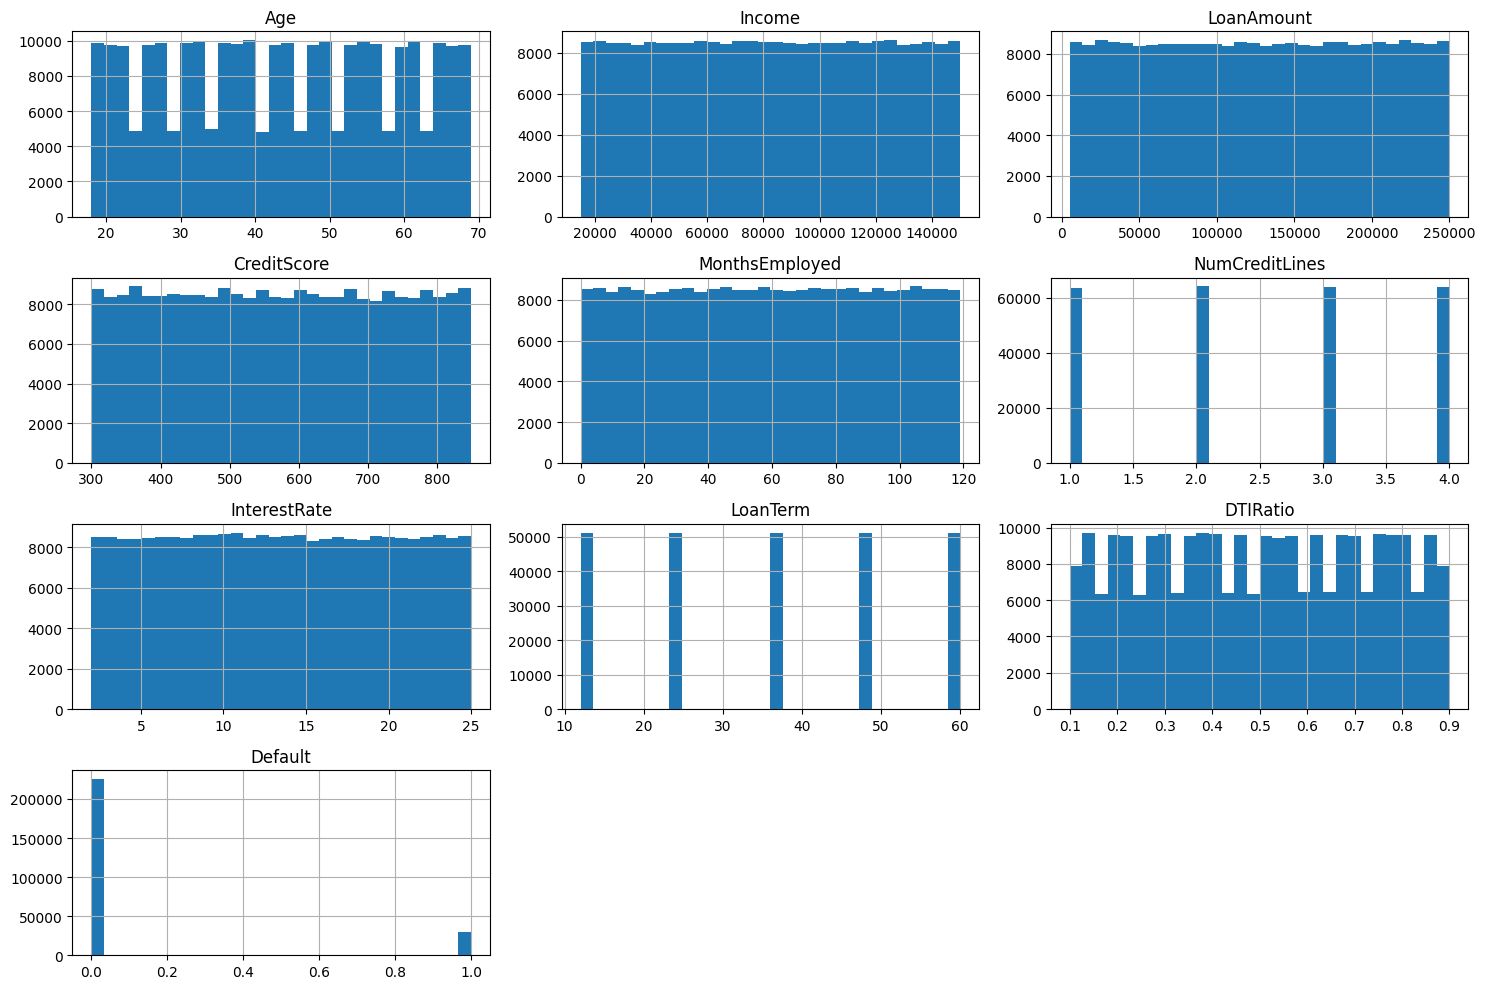

In [8]:
# 4.1.2 Histograms of numerical features
num_cols = raw.select_dtypes(include=['int64', 'float64']).columns  # Define numerical columns based on dtype
raw[num_cols].hist(figsize=(15, 10), bins=30)  # Plot histograms for numerical features
plt.tight_layout()  # Adjust layout automatically
plt.show()  # Display the plot

---

In [9]:
# 4.1.3 Check for skewness of numerical features
skew = raw[num_cols].skew() 
print(skew)

Age               0.000698
Income           -0.000381
LoanAmount       -0.001827
CreditScore       0.004688
MonthsEmployed   -0.002142
NumCreditLines   -0.000278
InterestRate      0.004608
LoanTerm         -0.002178
DTIRatio         -0.001499
Default           2.396377
dtype: float64


---

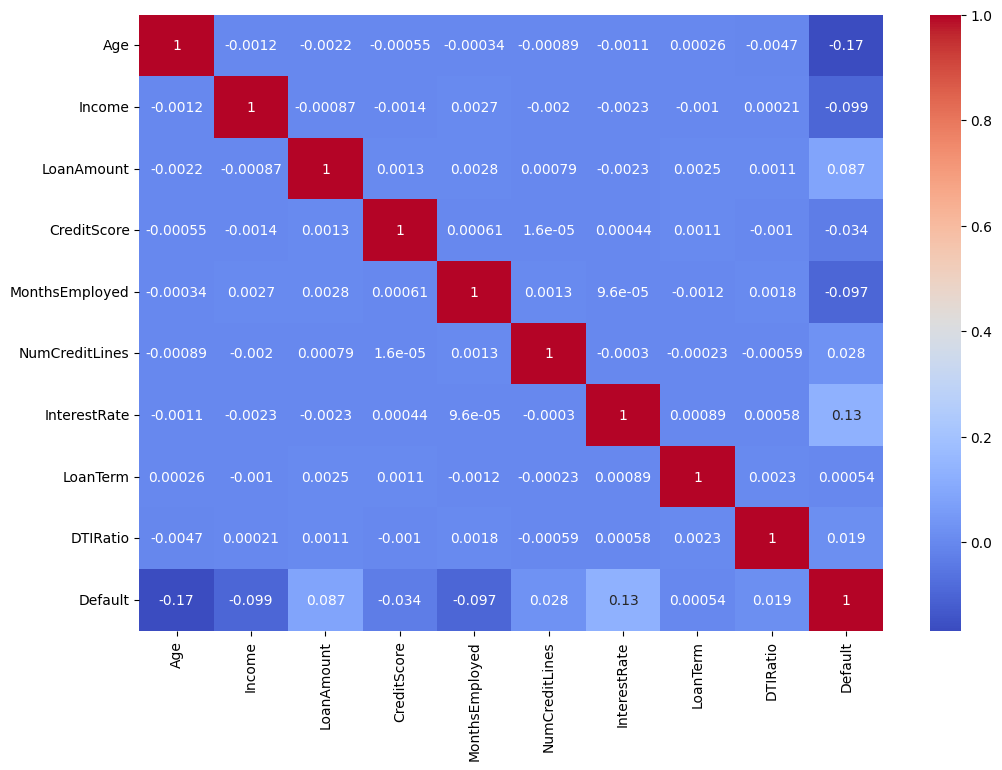

In [10]:
# 4.1.4 Correlation matrix
corr_mat = raw[num_cols].corr()  # Define the correlation matrix in the context of numerical columns
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')  # Plot the correlation matrix
plt.show()

---

In [11]:
# 4.1.5 Summary of categorical features
cat_cols = raw.select_dtypes(include=['object']).columns  # Define categorical columns
for col in cat_cols:  # Print unique values for each categorical column
    print(raw[col].value_counts())

LoanID
ZTH91CGL0B    1
I38PQUQS96    1
HPSK72WA7R    1
QU29Z1EVQI    1
QXBHNXNA9X    1
             ..
0HGZQKJ36W    1
H8GXPAOS71    1
A9S62RQ7US    1
EY08JDHTZP    1
V2KKSFM3UN    1
Name: count, Length: 255347, dtype: int64
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


---

<div class="alert alert-block alert-warning">

<h2 style='font-size:18px; font-weight:bold'>4.2 Preprocessing</h2>
</div>

##### 4.2.1 Drop unnecessary columns

In [12]:
col_drop = ['LoanID', 'Education', 'MaritalStatus']  # Define columns to drop
raw_clean = raw.drop(columns=col_drop)  # Drop the columns and assign to new dataframe
raw_clean.head()  # Display the first few rows of the cleaned dataframe

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Full-time,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Full-time,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Unemployed,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,Full-time,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Unemployed,No,Yes,Auto,No,0


---

#### 4.2.2 Encoding features

In [13]:
# Define the columns to be encoded
label_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']  # Define columns for LabelEncoder
onehot_cols = ['EmploymentType', 'LoanPurpose']  # Define columns for OneHotEncoder
rest_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']  # Define columns not to be encoded

# Apply label encoding to the label columns
LE = LabelEncoder()  # Create an instance of LabelEncoder
le_df = raw_clean[label_cols].apply(LE.fit_transform)  # Apply label encoding to the specified columns

# Apply one-hot encoding to the one-hot columns
OHE = OneHotEncoder(drop='first', sparse_output=False)  # Create an instance of OneHotEncoder
ohe_df = pd.DataFrame(OHE.fit_transform(raw_clean[onehot_cols]))  # Apply one-hot encoding to the specified columns

# Get feature names for the one-hot columns
ohe_feat_names = OHE.get_feature_names_out(onehot_cols)

# Create the final DataFrame
ohe_df.columns = ohe_feat_names  # Assign column names to the one-hot encoded DataFrame
final_df = pd.concat([le_df, ohe_df, raw_clean[rest_cols]], axis=1)  # Combine the encoded columns with the rest of the data and assign a new DataFrame

final_df.head()  # Display the first few rows of the final DataFrame

,HasMortgage,HasDependents,HasCoSigner,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,69,50432,124440,458,15,1,4.81,60,0.68,0
2,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,46,84208,129188,451,26,3,21.17,24,0.31,1
3,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32,31713,44799,743,0,3,7.07,24,0.23,0
4,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,60,20437,9139,633,8,4,6.51,48,0.73,0


<style>.justified-text{text-align:justify;}</style>

<div class='alert alert-block, alert-info'>

**Exploratory Data Analysis (EDA)**:

* **Descriptive Statistics**: Basic statistics were computed for numerical features like `Age`, `Income`, and `LoanAmount`. Features like `Income` and `LoanAmount` showed high variability, indicating diverse financial profiles.

* **Skewness & Correlation**: Mild skewness was observed in most features with `Default` showing high positive skew.

* **Categorical Features**: Variables like `EmploymentType` and `LoanPurpose` were analyzed for their distributions, with some features being binary (e.g., `HasMortgage`) and others multi-class.

**Preprocessing**:
* **Feature Engineering**:
    * Label Encoding was applied to binary features.
    * One-Hot Encoding was used for multi-category features.
    * Standardization was applied to numerical features.

* **Dropped Columns**: Irrelevant columns (e.g. `LoanID`) were removed to reduce dimensionality.

**Outcome**:
Keeping in mind the aim of the project (ref. Task 1 - Context) i.e. classification of loan applicants to predict the defaulters,  the dataset was cleaned, and encoded with the help of the processes mentioned above, making it ready for model development.

</div>

---
---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 5 - Baselines and Learning Curves</h1>
</div>

<div class="alert alert-block alert-warning">

<h2 style='font-size:18px; font-weight:bold'>5.1 Baselines</h2>
</div>

#### 5.1.0 Split the data

In [14]:
# Define feature and target variables
X = final_df.drop(columns=['Default'])  # Features
y = final_df['Default']  # Target variable

In [15]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X: Features (independent variables)
# y: Target variable (dependent variable)
# test_size=0.2: Specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training
# random_state=42: Ensures reproducibility by setting a fixed seed for the random number generator
# stratify=y: Ensures that the split maintains the same proportion of classes in both training and testing sets as in the original dataset

# Confirm the shapes of X_train, X_test, y_train and y_test
print(f"X_train shape after split: {X_train.shape}")
print(f"X_test shape after split: {X_test.shape}")
print(f"y_train shape after split: {y_train.shape}")
print(f"y_test shape after split: {y_test.shape}")

X_train shape after split: (204277, 19)
X_test shape after split: (51070, 19)
y_train shape after split: (204277,)
y_test shape after split: (51070,)


In [16]:
# Scaling the training set
scaler = StandardScaler()  # Create an instance of StandardScaler
X_train_sc = scaler.fit_transform(X_train)  # Fit and transform the training data

# Confirm the shapes of X_train after scaling
print(f"X_train_sc shape (X_train after scaling): {X_train_sc.shape}")

X_train_sc shape (X_train after scaling): (204277, 19)


<div class='alert alert-block alert-info'>

Shapes of the training and testing sets:
* After split:
    * X_train : (204277, 19)
    * X_test : (51070, 19)
    * y_train : (204277,)
    * y_test : (51070,)
* After scaling:
    * X_train_sc : (204277, 19)
</div>

---

#### 5.1.1 & 5.1.2 Set up cross validation and determine an appropriate baseline

In [17]:
# Create baseline model
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
# DummyClassifier: A simple model used to provide a baseline for comparison with more sophisticated models.
# strategy='stratified': Ensures that predictions are made by randomly selecting labels in proportion to their frequencies in the training data.
# random_state=42: Sets the random seed for reproducibility, ensuring the results are consistent across runs.

# Evaluate the baseline models using cross-validation
dummy_acc = cross_val_score(dummy_clf, X_train_sc, y_train, cv=5, scoring='accuracy')
dummy_f1 = cross_val_score(dummy_clf, X_train_sc, y_train, cv=5, scoring='f1')
# Cross-validation: Helps to evaluate the performance of the baseline model across different splits of the training data.
# cv=3: Specifies 5-fold cross-validation (the data will be split into 5 parts, and the model will be trained and validated 5 times).
# scoring='accuracy': The model’s performance will be evaluated using accuracy as the metric (proportion of correct predictions).
# scoring='f1': The model’s performance will be evaluated using the F1 score (harmonic mean of precision and recall, useful for imbalanced data).

# Print the results
print("Baseline Accuracy:", dummy_acc.mean())
print("Baseline F1:", dummy_f1.mean())

Baseline Accuracy: 0.7945143161649716
Baseline F1: 0.11499051233396584


<div class='alert alert-block alert-info'>

* Baseline Accuracy: 0.7945143161649716
* Baseline F1 Score: 0.11499051233396584
</div>

---

### 5.1.3 & 5.1.4 Select two ML algorithms and apply necessary transformations to the data

<style>.justified-text{text-align:justify;}</style>
<div class='alert alert-block alert-info'>
<p class="text-justify">

* The two ML algorithms A1 & A2:

    Given that loan default prediction is typically a binary classification problem, **Logistic Regression** and **Random Forest** are good choices for the following reasons:

    * **Logistic Regression** offers a simple, interpretable model that is easy to implement and works well when the data is linearly separable. It’s also computationally efficient and can handle large datasets.

    * **Random Forest** is a powerful, non-linear model that can handle feature interactions well and provides better flexibility compared to Logistic Regression. It’s known to perform very well on structured data like a loan dataset.

* The implementations of A1 & A2 in `scikit-learn` will be used as follows:
    * A1: `sklearn.ensemble.RandomForestClassifier`

    * A2: `sklearn.linear_model.LogisticRegression`

* For Logistic Regression, feature scaling is necessary because the model is sensitive to the magnitude of the input features. Scaling ensures that all features are on a similar scale, improving model convergence. This has been partly accomplished in the previous step using `StandardScaler` after the data was split into training and testing sets. The test set will be scaled now.

* In contrast, Random Forest does not require scaling, as it is based on decision trees, which are not affected by the scale of the data. However, categorical variables must be properly encoded before fitting the model which has been done in preprocessing using `OneHotEncoder`.

</p>
</div>

In [18]:
# Scale the test data
X_test_sc = scaler.transform(X_test)  # Transform the test data

# Check the shape of the scaled test data
X_test_sc.shape

(51070, 19)

In [19]:
# Ensure that the categorical features have been encoded
print(X_train.dtypes)
print(X_test.dtypes)

HasMortgage                       int64
HasDependents                     int64
HasCoSigner                       int64
EmploymentType_Part-time        float64
EmploymentType_Self-employed    float64
EmploymentType_Unemployed       float64
LoanPurpose_Business            float64
LoanPurpose_Education           float64
LoanPurpose_Home                float64
LoanPurpose_Other               float64
Age                               int64
Income                            int64
LoanAmount                        int64
CreditScore                       int64
MonthsEmployed                    int64
NumCreditLines                    int64
InterestRate                    float64
LoanTerm                          int64
DTIRatio                        float64
dtype: object
HasMortgage                       int64
HasDependents                     int64
HasCoSigner                       int64
EmploymentType_Part-time        float64
EmploymentType_Self-employed    float64
EmploymentType_Unemployed 

<div class='alert alert-block alert-info'>

* Test set scaled shape: (51070, 19)
* Categorical features have been one-hot encoded.
</div>

---

#### 5.5 Select the hyperparameters to be optimized

<div class='alert alert-block alert-info'>

This is the choice of the hyperparameters for each algorithm:

* For **A1**:

    * `n_estimators`: Controls the number of trees in the forest. It affects model performance and overfitting.

    * `max_depth`: Controls the maximum depth of each tree. Helps manage overfitting.

* For **A2**:

    * `C`: Controls the regularization strength. Higher values result in less regularization.

    * `solver`: The algorithm used for optimization. Some solvers may work better with specific data sets.

</div>

---

<div class="alert alert-block alert-warning">

<h2 style='font-size:18px; font-weight:bold'>5.2 Learning Curves</h2>
</div>

#### 5.6 Evaluate baselines and built learning curves for A1 & A2

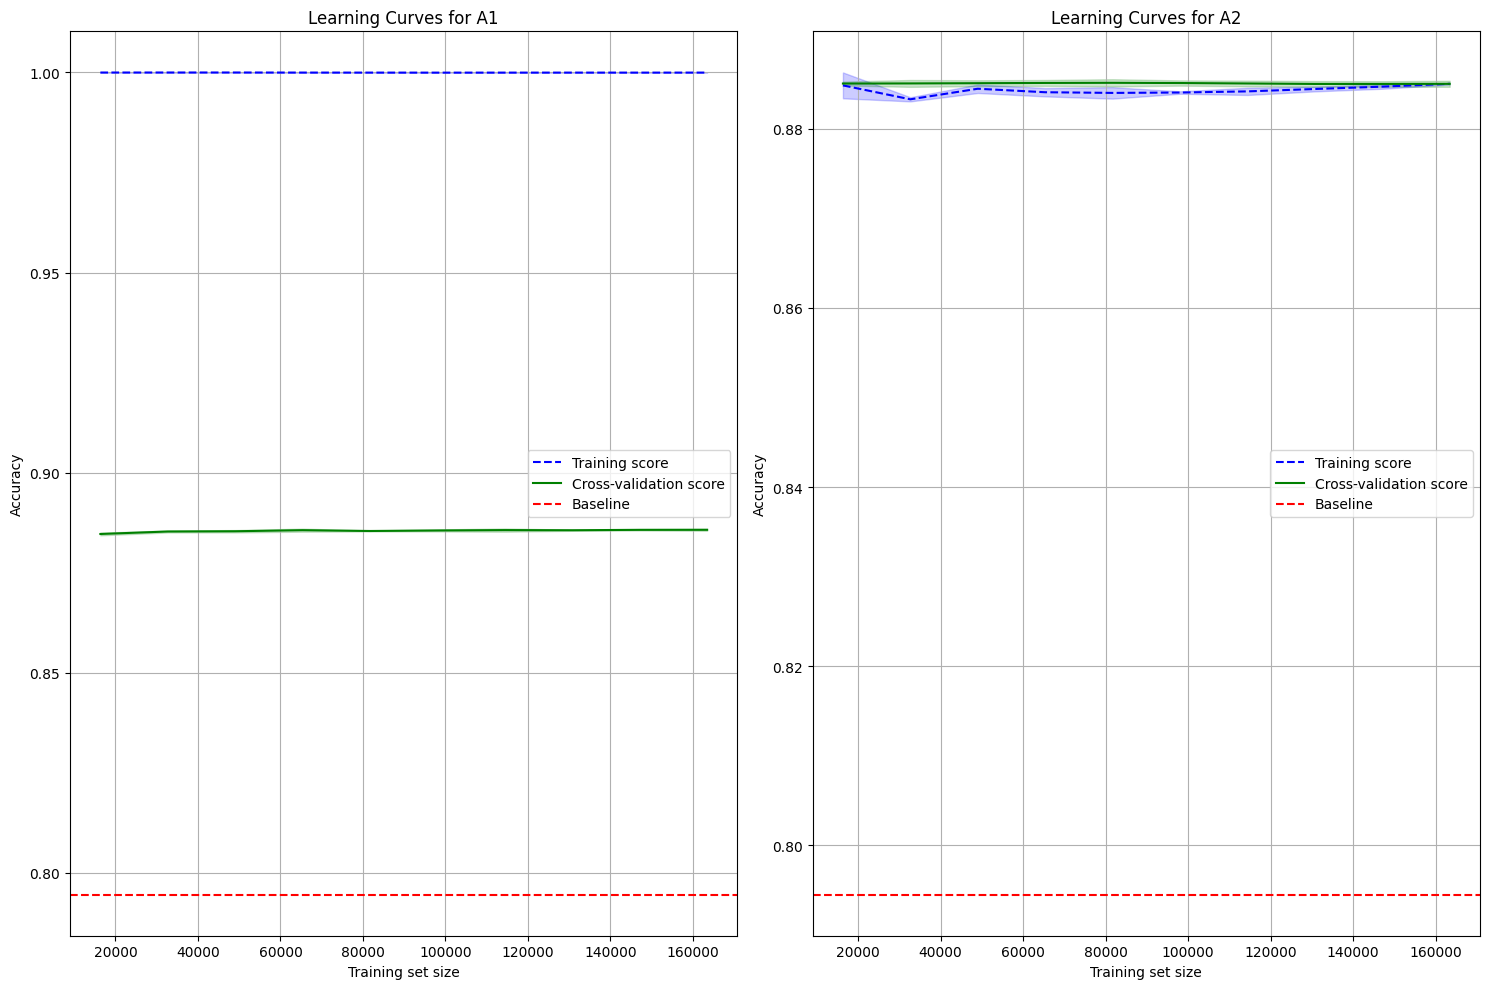

A1 Training scores: [0.99998776 0.99999388 0.99999592 0.99997552 0.99997063 0.99996125
 0.99996678 0.9999694  0.999966   0.99997308]
A1 CV scores: [0.88465172 0.88527343 0.88533707 0.88560631 0.88540071 0.88553288
 0.88562589 0.88558673 0.88568953 0.88569932]
A2 Training scores: [0.88482438 0.8832701  0.88444907 0.88405948 0.88398482 0.88402684
 0.88415476 0.88442051 0.8846816  0.88500376]
A2 CV scores: [0.88502866 0.88504335 0.88506783 0.8850972  0.88511188 0.88508741
 0.88503845 0.8849846  0.88498461 0.88499929]


In [20]:
# Define the two ML algorithms
# A1
A1 = RandomForestClassifier(random_state=42, n_jobs=-1)
# A1 is a RandomForestClassifier, which is an ensemble method that combines multiple decision trees to improve predictive performance
# n_jobs=-1: Utilizes all available CPU cores for parallel processing, speeding up training
# random_state=42: Ensures reproducibility of the results by setting a random seed

# A2
A2 = LogisticRegression(random_state=42, max_iter=1000)
# A2 is a LogisticRegression model, which is a linear classifier used for binary or multi-class classification tasks
# max_iter=100: Limits the maximum number of iterations for the solver to converge
# random_state=42: Ensures reproducibility of the results by setting a random seed

# From step 5.2, baseline accuracy mean
dummy_base_acc = dummy_acc.mean()  # Baseline accuracy mean

# Define a function to plot learning curves for any given estimator (model)
def plt_learn_crv(estimator, X, y, title, ax, baseline_acc):
    '''
    Generate learning curves by varying the size of the training set.

    This function evaluates the performance of a given machine learning estimator (model) by plotting
    learning curves. The learning curves show how the model's performance changes as the size of the 
    training set increases, helping to diagnose underfitting or overfitting.

    Parameters:
    -----------
    estimator : object
        The machine learning model to evaluate (e.g., RandomForestClassifier, LogisticRegression).
    
    X : array-like, shape (n_samples, n_features)
        The feature matrix for training, where each row represents a sample and each column represents a feature.
    
    y : array-like, shape (n_samples,)
        The target variable for training, where each value corresponds to a sample in `X`.
    
    title : str
        The title to display on the learning curve plot.
    
    ax : matplotlib.axes.Axes
        The axes on which to plot the learning curves.
    
    baseline_acc : float
        The baseline accuracy to compare the model's performance against (e.g., from a dummy classifier).

    Returns:
    --------
    train_mean : array, shape (n_train_sizes,)
        The mean training scores for each training set size.

    test_mean : array, shape (n_train_sizes,)
        The mean cross-validation scores for each training set size.
        
    '''
    # Generate learning curves
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1, scoring='accuracy')
    # learning_curve: Generates learning curves by varying the size of the training set (train_sizes)
    # estimator: The ML model to evaluate
    # X: Features for training
    # y: Target variable for training
    # cv=5: Performs 5-fold cross-validation to evaluate performance
    # train_sizes=np.linspace(0.1, 1.0, 10): Varies the training set size from 10% to 100%, in 10 steps
    # n_jobs=1: Runs the training on a single CPU core (can change for parallelism)
    # scoring='accuracy': Evaluates the model using accuracy as the metric
    
    
    # Calculate mean and std. dev. for the learning curves
    train_mean = np.mean(train_scores, axis=1)  # Mean of training scores
    train_std = np.std(train_scores, axis=1)  # Std. dev. of training scores
    test_mean = np.mean(test_scores, axis=1)  # Mean of cross-validation scores
    test_std = np.std(test_scores, axis=1)  # Std. dev. of cross-validation scores
    
    # Plot learning curves
    ax.plot(train_sizes, train_mean, '--', color='blue', label='Training score')
    ax.plot(train_sizes, test_mean, color='green', label='Cross-validation score')
    # - '--' line style for training scores (blue)
    # - Solid line for cross-validation scores (green)
    
    # Fill between the learning curves with shading for std. dev.
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
    
    # Plot baseline performance
    ax.axhline(y=baseline_acc, color='red', linestyle='--', label='Baseline')
    # - '--' line style for training scores (red)

    # Set plot title, labels, and grid
    ax.set_title(title)
    ax.set_xlabel('Training set size')
    ax.set_ylabel('Accuracy')
    ax.grid()  # Add grid lines to the plot
    ax.legend()  # Add a legend to the plot
    
    # Return scores for printing
    return train_mean, test_mean
    
# Create subplots for the learning curves (one for each model)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))  # Create two subplots side by side

# Plot learning curve for A1
train_mean_A1, test_mean_A1 = plt_learn_crv(estimator=A1, X=X_train, y=y_train, title='Learning Curves for A1', ax=axs[0], baseline_acc=dummy_base_acc)
# axs[0]: The first subplot (left) for A1
# X_train: Non-scaled features for training

# Plot learning curve for A2
train_mean_A2, test_mean_A2 = plt_learn_crv(estimator=A2, X=X_train_sc, y=y_train, title='Learning Curves for A2', ax=axs[1], baseline_acc=dummy_base_acc)
# axs[1]: The second subplot (right) for A2
# X_train_sc: Scaled features for training

plt.tight_layout()  # Adjust layout automatically
plt.show()  # Show the plot

# Print the scores for the learning curves
print('A1 Training scores:', train_mean_A1)  # Print training scores for A1
print('A1 CV scores:', test_mean_A1)  # Print CV scores for A1
print('A2 Training scores:', train_mean_A2)  # Print training scores for A2
print('A2 CV scores:', test_mean_A2)  # Print CV scores for A2

<div class='alert alert-block alert-info'>

* For A1:
    * The training set accuracy remains relatively stables as its size increases around 0.999.
    * The test set accuracy also remains relatively stable as its size increases around 0.885.
    * Both the training and test set accuracies are higher than the baseline.

* For A2:
    * The training set accuracy remain relatively stable as its size increases around 0.884.
    * The test set accuracy remain relatively stable as its size increases around 0.885.
    * Both the training and test set accuracies are higher than the baseline.
</div>

---

#### 5.7 Visualizations comparing hyperparameters and baseline

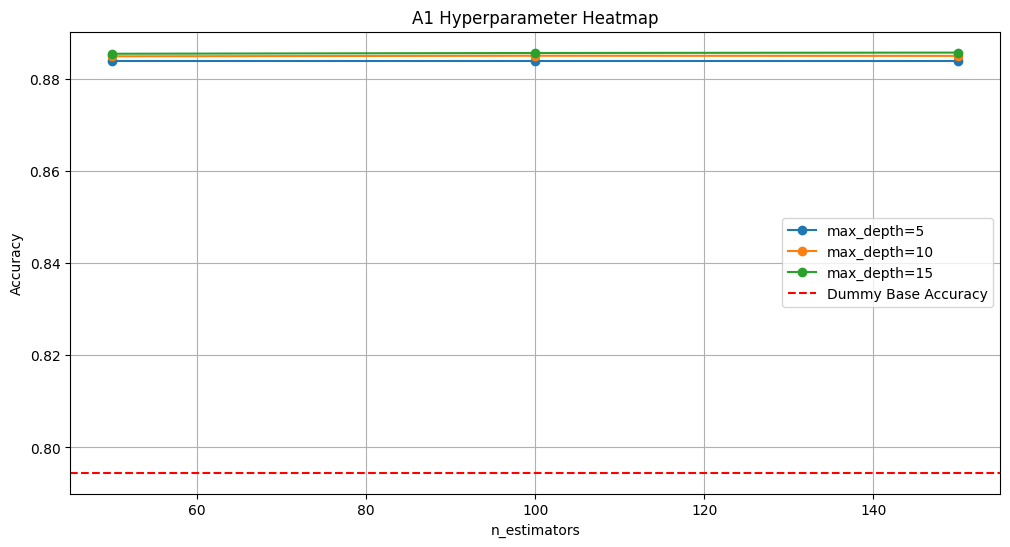

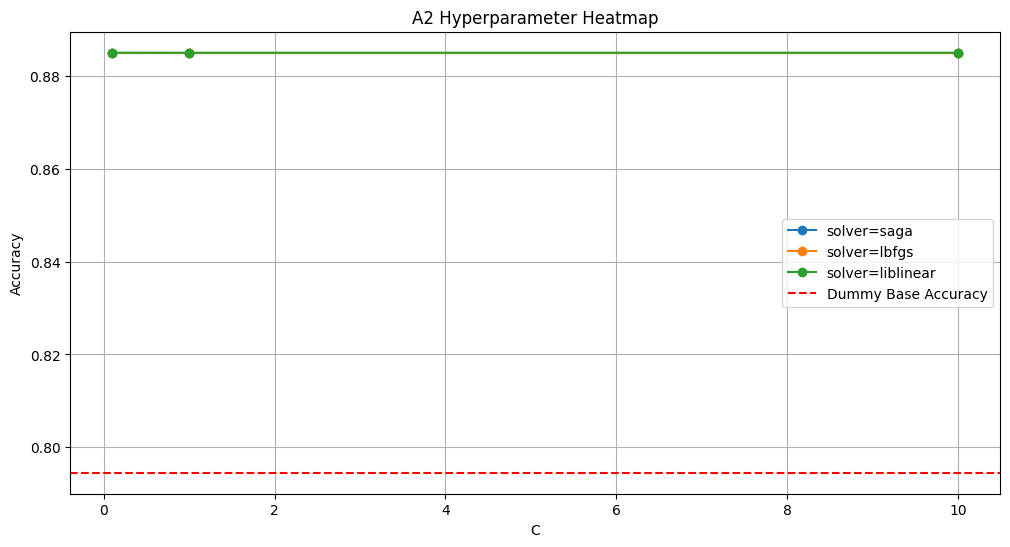

In [21]:
# Define hyperparameters and values for each algorithm
# For A1
A1_params = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
# A1_params: Hyperparameter grid for the A1
# 'n_estimators': The number of trees in the forest (options: 50, 100, 150)
# 'max_depth': The maximum depth of each tree (options: 5, 10, 15)

# For A2
A2_params = {'C': [0.1, 1, 10], 'solver': ['saga', 'lbfgs', 'liblinear']}
# A2_params: Hyperparameter grid for the A2
# 'C': Regularization strength (options: 0.1, 1, 10). Smaller values indicate stronger regularization.
# 'solver': The algorithm to use for optimization (options: 'saga', 'lbfgs', 'liblinear')

# For A1
A1_results = []  # Initialize an empty list to store A1 results

# Iterate over all hyperparameter combinations
for n_estimators in A1_params['n_estimators']:
    for max_depth in A1_params['max_depth']:
        # Create and fit the model with current hyperparameters
        A1.set_params(n_estimators=n_estimators, max_depth=max_depth)
        
        # Perform cross-validation and calculate mean accuracy
        score=cross_val_score(A1, X_train, y_train, cv=5, scoring='accuracy').mean()
        
        # Append results to the empty list as a tuple
        A1_results.append((n_estimators, max_depth, score))
        
# For A2
A2_results = []  # Initialize an empty list to store A2 results

# Iterate over all hyperparameter combinations
for C in A2_params['C']:
    for solver in A2_params['solver']:
        # Create and fit the model with current hyperparameters
        A2.set_params(C=C, solver=solver)
        
        # Perform cross-validation and calculate mean accuracy
        score=cross_val_score(A2, X_train_sc, y_train, cv=5, scoring='accuracy').mean()
        
        # Append results to the empty list as a tuple
        A2_results.append((C, solver, score))

# Convert results to DataFrame
def create_df(results, param_labels):
    '''
    Converts the results of hyperparameter tuning into a pandas DataFrame for easier inspection and visualization.
    
    Parameters:
    -----------
    results : list of tuples
        The results from the hyperparameter grid search, where each tuple contains the hyperparameters and their corresponding score.
        
    param_labels : list of str
        The names of the hyperparameters being tested, to be used as column names in the DataFrame.
    
    Returns:
    --------
    df : pandas.DataFrame
        A DataFrame containing the hyperparameters and corresponding accuracy scores.
        
    '''
    df = pd.DataFrame(results, columns=param_labels + ['score'])
    return df

# Plot learning curves for A1
A1_df = create_df(A1_results, ['n_estimators', 'max_depth'])  # Create DataFrame containing the results for A1 with hyperparameters

plt.figure(figsize=(12, 6))  # Create a new figure with a specified size

# For each value of max_depth, plot the corresponding accuracy scores for different values of n_estimators
for max_depth in A1_params['max_depth']:
    temp_df = A1_df[A1_df['max_depth'] == max_depth]  # Filter the DataFrame for the current max_depth
    plt.plot(temp_df['n_estimators'], temp_df['score'], label=f'max_depth={max_depth}', marker='o')

# Plot baseline accuracy as a reference
plt.axhline(y=dummy_base_acc, color='red', linestyle='--', label='Dummy Base Accuracy')

# Add labels and title
plt.title('A1 Hyperparameter Heatmap')
plt.xlabel('n_estimators')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add a grid to the plot
plt.show()  # Display the plot

# Plot learning curves for A2
A2_pivot_df = create_df(A2_results, ['C', 'solver'])  # Create DataFrame containing the results for A2 with hyperparameters

plt.figure(figsize=(12, 6))  # Create a new figure with a specified size

# For each value of solver, plot the corresponding accuracy scores for different values of C
for solver in A2_params['solver']:
    temp_df = A2_pivot_df[A2_pivot_df['solver'] == solver]  # Filter the DataFrame for the current solver
    plt.plot(temp_df['C'], temp_df['score'], label=f'solver={solver}', marker='o')

#  Plot baseline accuracy as a reference
plt.axhline(y=dummy_base_acc, color='red', linestyle='--', label='Dummy Base Accuracy')

# Add labels and title
plt.title('A2 Hyperparameter Heatmap')
plt.xlabel('C')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add a grid to the plot
plt.show()  # Display the plot


<div class='alert alert-block alert-info'>

In order to find a suitable model to solve the classification problem as defined in **Task 1 - Context**, the following steps were performed:

1. **Base Model Performance**: After setting up cross validation, the baseline model performance was evaluated and the results were as follows:
    * Baseline Accuracy: **0.7945143161649716**
    * Baseline F1 Score: **0.11499051233396584**

2. Two ML algorithms **A1 (Random Forest Classifier)** & **A2 (Logistic Regression)** and their implementation from scikit-learn were chosen for further evaluation:
    * A1: `sklearn.ensemble.RandomForestClassifier`

    * A2: `sklearn.linear_model.LogisticRegression`

3. For each model, exactly **two hyperparameters** were chosen as follows:
    * A1: `n_estimators`, `max_depth`

    * A2: `C`, `solver`

4. **Learning Curves** (ref. 5.6):
    * **A1**: Shows a stable performance as more data is used, both in the training scores & test scores which are higher than the baseline.

    * **A2**: Shows a stable performance as more data is used, both in the training scores & test scores which are higher than the baseline.

5. **Comparison of Hyperparameter Configurations**:
    * The two ML algorithms, A1 and A2, were tested across various hyperparameter values, and the performance was plotted and compared visually **(5.7)**, showing how different hyperparameters impact model performance relative to the baseline.
</div>

---
---

<div class='alert alert-block alert-warning'>
<h1 style='font-size: 25px; font-weight: bold'>Task 6 - Nested Cross Validation</h2>
</div>

#### 6.1 Define the hyperparameter grid

In [22]:
# Define hyperparameters grids to tune
# For A1
A1_grid_params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [15, 20, 25]  # Maximum depth of the tree
}

# For A2
A2_grid_params = {
    'C': [0.1, 1, 10],  # Regularization parameter: smaller values specify stronger regularization which can help prevent overfitting.
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

---

#### 6.2 & 6.3 Find optimal hyperparameter settings and compare the train & test result

#### 6.2.1 For A1 Evaluation

In [23]:
# Define the model and hyperparameter grid for A1
model = A1  # The model to be evaluated
param_grid = A1_grid_params  # The hyperparameter grid for A1
X_train_data = X_train  # Use original training data for A1

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
# 'estimator': The model to be optimized
# 'param_grid': The hyperparameter grid to search through
# 'scoring': The performance metric to use for evaluation (accuracy)
# 'cv': The number of folds for cross-validation (5-fold)
# 'n_jobs': Set to -1 to use all available CPU cores for parallel computation

# Define cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# 'n_splits=5': 5-fold cross-validation
# 'shuffle=True': Shuffle the data before splitting into train/test sets
# 'random_state=42': Ensure reproducibility by setting a fixed random seed

# Initialize lists to store performance scores from the outer cross-validation loop
outer_train_scores = []  # Store training accuracy scores per fold
outer_test_scores = []  # Store test accuracy scores per fold

# Outer cross-validation loop (5-fold cross-validation)
for train_idx, test_idx in outer_cv.split(X_train_data, y_train):
    # Split the data using the indices
    X_train_fold, X_test_fold = X_train_data.iloc[train_idx], X_train_data.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Perform GridSearchCV on the training fold to find best hyperparameters
    grid_search.fit(X_train_fold, y_train_fold)
    
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Evaluate on training fold
    y_train_pred = best_model.predict(X_train_fold)
    outer_train_scores.append({
        'accuracy': accuracy_score(y_train_fold, y_train_pred),
        'f1': f1_score(y_train_fold, y_train_pred)
    })

    # Evaluate on the test fold
    y_test_pred = best_model.predict(X_test_fold)
    outer_test_scores.append({
        'accuracy': accuracy_score(y_test_fold, y_test_pred),
        'f1': f1_score(y_test_fold, y_test_pred)
    })

# Calculate average scores across all outer folds
avg_train_acc = np.mean([score['accuracy'] for score in outer_train_scores])
avg_train_f1 = np.mean([score['f1'] for score in outer_train_scores])
avg_test_acc = np.mean([score['accuracy'] for score in outer_test_scores])
avg_test_f1 = np.mean([score['f1'] for score in outer_test_scores])

# Print results
print(f"Model: A1")
print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Train F1: {avg_train_f1}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Test F1: {avg_test_f1}")

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")
print("="*50)

/Users/aneesh/Documents/Data Science/WiSe2024/Machine Learning/.venvML/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Model: A1
Average Train Accuracy: 0.9874949130629563
Average Train F1: 0.942259822139906
Average Test Accuracy: 0.8858168105491927
Average Test F1: 0.07206002515555594
Best Hyperparameters: {'max_depth': 25, 'n_estimators': 200}


<div class="alert alert-block alert-info">

<h1 style="font-size: 18px; font-weight: bold">Model: A1</h1>

* **Average Train Accuracy**: 0.9874949130629563
* **Average Train F1**: 0.942259822139906
* **Average Test Accuracy**: 0.8858168105491927
* **Average Test F1**: 0.07206002515555594
* **Best Hyperparameters**: `{'max_depth': 25, 'n_estimators': 200}`

<h1 style="font-size: 18px; font-weight: bold">Interpretation</h1>

* The **train accuracy** is very high at **98.75%**, which suggests that the model has learned well on the training data. The **train F1 score** is at **0.94**, indicating that the model does well to capture the minority class, while achieving high accuracy. This suggests that the model does well towards predicting both the **majority class** as well as the **minority class**.

* The **test accuracy (88.58%)** is also high, but the **test F1 score (0.07)** is very low, which suggests **poor generalization** performance for the minority class on the test set. This likely indicates that the model is **overfitting** to the majority class but failing to generalize well to the minority class during testing.

* The **large difference** between train and test F1 scores indicates that the model is likely overfitting, especially on the majority class, and it fails to generalize well to the minority class.
</div>

#### 6.2.2 For A2 Evaluation

In [24]:
# Define the model and hyperparameter grid for A2
model = A2  # The model to be evaluated
param_grid = A2_grid_params  # Hyperparameter grid for A2
X_train_data = X_train_sc  # Use scaled data for A2

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Define cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# 'estimator': The model to be optimized
# 'param_grid': The hyperparameter grid to search through
# 'scoring': The performance metric to use for evaluation (accuracy)
# 'cv': The number of folds for cross-validation (5-fold)
# 'n_jobs': Set to -1 to use all available CPU cores for parallel computation

# Initialize lists to store performance scores from outer cross-validation loops
outer_train_scores = []
outer_test_scores = []

for train_idx, test_idx in outer_cv.split(X_train_data, y_train):
    # Split the data using the indices
    X_train_fold, X_test_fold = X_train_data[train_idx], X_train_data[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Perform GridSearchCV on the training fold to find best hyperparameters
    grid_search.fit(X_train_fold, y_train_fold)
    
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Evaluate on training fold (to check overfitting)
    y_train_pred = best_model.predict(X_train_fold)
    outer_train_scores.append({
        'accuracy': accuracy_score(y_train_fold, y_train_pred),  # Accuracy of predictions on training data
        'f1': f1_score(y_train_fold, y_train_pred)  # F1 score of predictions on training data
    })

    # Evaluate on the test fold
    y_test_pred = best_model.predict(X_test_fold)
    outer_test_scores.append({
        'accuracy': accuracy_score(y_test_fold, y_test_pred),  # Accuracy of predictions on test data
        'f1': f1_score(y_test_fold, y_test_pred)  # F1 score of predictions on test data
    })

# Calculate average scores across all outer folds
avg_train_acc = np.mean([score['accuracy'] for score in outer_train_scores])
avg_train_f1 = np.mean([score['f1'] for score in outer_train_scores])
avg_test_acc = np.mean([score['accuracy'] for score in outer_test_scores])
avg_test_f1 = np.mean([score['f1'] for score in outer_test_scores])

# Print results
print(f"Model: A2")
print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Train F1: {avg_train_f1}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Test F1: {avg_test_f1}")

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")
print("="*50)

Model: A2
Average Train Accuracy: 0.8849919471524863
Average Train F1: 0.05948518673044874
Average Test Accuracy: 0.8849895001825695
Average Test F1: 0.05939360343010164
Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}


<div class="alert alert-block alert-info">

<h1 style="font-size: 18px; font-weight: bold">Model: A2</h1>

* **Average Train Accuracy**: 0.8849919471524863
* **Average Train F1**: 0.05948518673044874
* **Average Test Accuracy**: 0.8849895001825695
* **Average Test F1**: 0.05939360343010164
* **Best Hyperparameters**: `{'C': 0.1, 'solver': 'liblinear'}`

<h1 style="font-size: 18px; font-weight: bold">Interpretation</h1>

* The **train accuracy** and **test accuracy** are pretty much **identical** at **88.50%**, suggesting that the model generalizes well to unseen data, as there is little overfitting.

* However, both the train and test **F1 scores** are **very low (0.06)**, which indicates poor performance, especially on the minority class. This could suggest that the model struggles with **class imbalance** and cannot correctly predict the minority class, which results in very poor F1 scores.

* The **consistency** between train and test **F1 scores** suggests that the model’s **low performance** is not due to overfitting but rather to its **inability** to **capture the minority class** due to the class imbalance.
</div>

#### 6.2.3 For Baseline Evaluation

In [25]:
# Define the model and hyperparameter grid for Dummy Classifier
model = dummy_clf  # The model to be evaluated
param_grid = {}  # No hyperparameters for Dummy Classifier
X_train_data = X_train  # Use original training data for Dummy Classifier

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Define cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store performance scores from outer cross-validation loops
outer_train_scores = []
outer_test_scores = []

for train_idx, test_idx in outer_cv.split(X_train_data, y_train):
    # Split the data using the indices
    X_train_fold, X_test_fold = X_train_data.iloc[train_idx], X_train_data.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Perform GridSearchCV on the training fold to find best hyperparameters
    grid_search.fit(X_train_fold, y_train_fold)
    
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Evaluate on training fold (to check overfitting)
    y_train_pred = best_model.predict(X_train_fold)
    outer_train_scores.append({
        'accuracy': accuracy_score(y_train_fold, y_train_pred), # Accuracy score on training data
        'f1': f1_score(y_train_fold, y_train_pred)  # F1 score on training data
    })

    # Evaluate on the test fold
    y_test_pred = best_model.predict(X_test_fold)
    outer_test_scores.append({
        'accuracy': accuracy_score(y_test_fold, y_test_pred),  #  Accuracy score on test data
        'f1': f1_score(y_test_fold, y_test_pred)  # F1 score on test data
    })

# Calculate average scores across all outer folds
avg_train_acc = np.mean([score['accuracy'] for score in outer_train_scores])
avg_train_f1 = np.mean([score['f1'] for score in outer_train_scores])
avg_test_acc = np.mean([score['accuracy'] for score in outer_test_scores])
avg_test_f1 = np.mean([score['f1'] for score in outer_test_scores])

# Print results
print(f"Model: Baseline")
print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Train F1: {avg_train_f1}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Test F1: {avg_test_f1}")
print("="*50)

Model: Baseline
Average Train Accuracy: 0.7949952751696953
Average Train F1: 0.11454635445828595
Average Test Accuracy: 0.7952877631751141
Average Test F1: 0.11832173729706937


<div class="alert alert-block alert-info">

<h1 style="font-size: 18px; font-weight: bold">Model: Baseline</h1>

* **Average Train Accuracy**: 0.7949952751696953
* **Average Train F1**: 0.11454635445828595
* **Average Test Accuracy**: 0.7952877631751141
* **Average Test F1**: 0.11832173729706937

<h1 style="font-size: 18px; font-weight: bold">Interpretation</h1>

* The **train accuracy (79.50%)** and **test accuracy (79.53%)** are **very similar**, which is expected since the **baseline** model **only predicts** the **majority class**. The model doesn't overfit or underfit because it essentially performs the task of predicting the majority class.

* The train and test **F1 scores** are both low **around 0.11–0.12**, which indicates that the model is **not capturing** the **minority class** at all and is simply predicting the majority class. The **small difference** between train and test F1 scores indicates that this model's performance is **stable but poor**.

* This result serves as a **benchmark** for the more sophisticated models (A1 and A2), showing that both models perform **better** than the baseline in terms of accuracy but still struggle with class imbalance.

</div>

---

#### 6.4 Compare final performances in a table

<div class="alert alert-block alert-info">

| Model | Train Accuracy |	Train F1 Score |	Test Accuracy |	Test F1 Score |
| ------ | -------------- | -------------- | -------------- | -------------- |
| A1 | 98.75% |	0.94 |	88.58% |	0.07  |
| A2 |	88.50% |	0.06 |	88.50% |	0.06 |
| Baseline | 79.50% |	0.11  |	79.53% |	0.12 |
</div>

---

#### 6.5 Discussion and Recommendation on Model Selection

<div class="alert alert-block alert-info">
<h1 style="font-size: 18px; font-weight: bold">Model Performances</h1>

* **A1**:
    * Train Accuracy: 98.75%, Test Accuracy: 88.58%
    * Train F1 Score: 0.94, Test F1 Score: 0.07
    * Best Hyperparameters: `max_depth=25`, `n_estimators=200`

* **A2**:
    * Train Accuracy: 88.50%, Test Accuracy: 88.50%
    * Train F1 Score: 0.06, Test F1 Score: 0.06
    * Best Hyperparameters: `C=0.1`, `solver='liblinear'`

* **Baseline**:
    * Train Accuracy: 79.50%, Test Accuracy: 79.53%
    * Train F1 Score: 0.11, Test F1 Score: 0.12

<h1 style="font-size: 18px; font-weight: bold">Key Observations</h1>

* **A1** shows high training accuracy but poor test F1 score, indicating overfitting and difficulty handling the minority class.

* **A2** provides consistent accuracy but struggles with the class imbalance, leading to low F1 scores.
    
* **Baseline** offers stable but poor performance, primarily predicting the majority class.

<h1 style="font-size: 18px; font-weight: bold">Strength and Weaknesses</h1>

* **A1**:
    * **Strengths**: High accuracy and flexibility, handling complex patterns. 
    * **Weaknesses**: Overfits to the majority class and struggles with class imbalance.

* **A2**:
     * **Strengths**: More consistent between train and test accuracy, simpler and interpretable.
    * **Weaknesses**: Fails to capture the minority class well, with low F1 scores.

* **Baseline**:
     * **Strengths**: Simple and stable.
    * **Weaknesses**: No real predictive value.

<h1 style="font-size: 18px; font-weight: bold">Interpretation of Results</h1>

* Both **A1** and **A2** struggle with class imbalance, leading to low F1 scores.

* **A1** shows signs of overfitting, performing well on training data but poorly on the minority class in the test set.

* **A2** provides better generalization but still fails to address the class imbalance effectively.

<h1 style="font-size: 18px; font-weight: bold">Final Recommendation</h1>

* **A2** is recommended due to its faster execution and better generalization compared to A1. While it still suffers from class imbalance, its performance is stable and interpretable. Moreover, the difference in performance on the test data between A1 and A2 is minimal, but A2 offers a more practical and efficient solution.

</div>

---
---

<div class='alert alert-block alert-warning'>
<h1 style='font-size: 25px; font-weight: bold'>Task 7 - Analysis of the Final Model</h2>
</div>

#### 7.1 Class-wise performance analysis

In [30]:
# Initialize lists to store the results across all folds
accuracy_class_0 = []  # Accuracy for class 0 (non-default)
accuracy_class_1 = []  # Accuracy for class 1 (default)
f1_class_0 = []        # F1-score for class 0 (non-default)
f1_class_1 = []        # F1-score for class 1 (default)

# Iterate over each fold in the outer CV
# This loop splits the data into training and test sets for each fold
for train_idx, test_idx in outer_cv.split(X_train_sc, y_train):
    y_test_fold = y_train.iloc[test_idx]  # True labels for the test fold
    
    # Define and train the A2 model using the optimal hyperparameters
    A2 = LogisticRegression(C=0.1, solver='liblinear', random_state=42, max_iter=100)  # Define the model using the optimal hyperparameters
    A2.fit(X_train_sc[train_idx], y_train.iloc[train_idx])  # Fit the model to the training data
    y_test_pred_fold = A2.predict(X_train_sc[test_idx])  # Predictions for the test fold
    
    # Calculate accuracy for each class (class 0 and class 1)
    accuracy_class_0_fold = accuracy_score(y_test_fold == 0, y_test_pred_fold == 0)
    accuracy_class_1_fold = accuracy_score(y_test_fold == 1, y_test_pred_fold == 1)
    
    # Calculate F1-score for each class (class 0 and class 1)
    f1_class_0_fold = f1_score(y_test_fold, y_test_pred_fold, pos_label=0)
    f1_class_1_fold = f1_score(y_test_fold, y_test_pred_fold, pos_label=1)
    
    # Append the results to the lists
    accuracy_class_0.append(accuracy_class_0_fold)
    accuracy_class_1.append(accuracy_class_1_fold)
    f1_class_0.append(f1_class_0_fold)
    f1_class_1.append(f1_class_1_fold)

# Calculate the average and standard deviation across all folds
avg_accuracy_class_0 = np.mean(accuracy_class_0)
avg_accuracy_class_1 = np.mean(accuracy_class_1)
std_accuracy_class_0 = np.std(accuracy_class_0)
std_accuracy_class_1 = np.std(accuracy_class_1)

avg_f1_class_0 = np.mean(f1_class_0)
avg_f1_class_1 = np.mean(f1_class_1)
std_f1_class_0 = np.std(f1_class_0)
std_f1_class_1 = np.std(f1_class_1)

# Print the aggregated results
print("Average and Std Accuracy, F1 for both classes:")
print(f"Class 0 (non-default) Accuracy: {avg_accuracy_class_0:.3f} ± {std_accuracy_class_0:.3f}")
print(f"Class 1 (default) Accuracy: {avg_accuracy_class_1:.3f} ± {std_accuracy_class_1:.3f}")
print(f"Class 0 (non-default) F1: {avg_f1_class_0:.3f} ± {std_f1_class_0:.3f}")
print(f"Class 1 (default) F1: {avg_f1_class_1:.3f} ± {std_f1_class_1:.3f}")

Average and Std Accuracy, F1 for both classes:
Class 0 (non-default) Accuracy: 0.885 ± 0.000
Class 1 (default) Accuracy: 0.885 ± 0.000
Class 0 (non-default) F1: 0.939 ± 0.000
Class 1 (default) F1: 0.059 ± 0.004


<div class="alert alert-block alert-info">

<h1 style="font-size: 18px; font-weight:bold">Final Model Performance:</h1>

* **Average and Standard Deviation of Accuracy and F1-score for both classes:**

    * Class 0 (non-default) Accuracy: **0.885 ± 0.000**
    * Class 0 (non-default) F1-score: **0.939 ± 0.000**
    * Class 1 (default) Accuracy: **0.885 ± 0.000**
    * Class 1 (default) F1-score: **0.059 ± 0.004**

<h1 style="font-size: 18px; font-weight:bold">Interpretation:</h1>

* **Accuracy**:

    * **Class 0 (non-default)**: The model is predicting this class very well, with an accuracy of **88.5%** across all folds.

    * **Class 1 (default)**: The model is predicting this class very well, with an accuracy of **88.5%** across all folds.
    
    * The accuracy is the same for both classes, at **88.5%**. This suggests that the model is effectively predicting both classes in terms of the overall accuracy.

* **F1-scores**:

    * **Class 0 (non-default)**: The F1-score of **0.939** is very high, which indicates that the model is very good at identifying Class 0. It combines both precision and recall well for this class.

    * **Class 1 (default)**: The F1-score of **0.059** is very low, which is concerning. Despite the high accuracy, the model is failing to identify the minority class (Class 1) well. This is a clear indicator that the model is biased toward predicting Class 0, likely due to class imbalance.

* **Discussion**:
     * **Imbalanced Class Distribution**: Given the class imbalance, the model seems to have a tendency to predict the majority class (Class 0) much more often than Class 1. The high accuracy, however, doesn't reflect how the model is handling the minority class (Class 1). This is clearly evident from the F1 scores. The very low F1 score for Class 1 suggests that while the model may correctly predict the majority class often, it fails to properly predict the minority class, which is critical in imbalanced datasets.

</div>

---

#### 7.2 Visualizations

#### 7.2.1 Bar plot across all folds

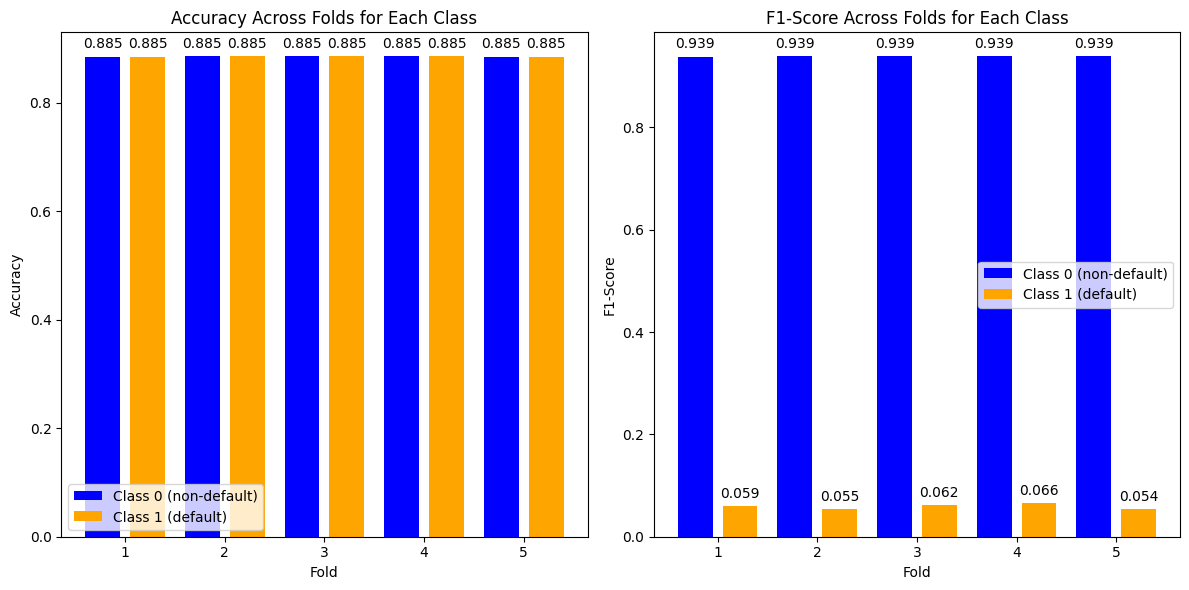

In [31]:
# Create fold numbers
folds = np.arange(1, len(accuracy_class_0) + 1)

# Define the class labels
class_labels = ['Class 0 (non-default)', 'Class 1 (default)']

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Two plots side by side

# Bar plot for Accuracy across folds
width = 0.35  # Bar width
gap = 0.1  # Gap between bars

bars_class_0_accuracy = axes[0].bar(folds - width/2 - gap/2, accuracy_class_0, width, label=class_labels[0], color='blue')
bars_class_1_accuracy = axes[0].bar(folds + width/2 + gap/2, accuracy_class_1, width, label=class_labels[1], color='orange')

# Add labels on top of bars for Accuracy
for bar in bars_class_0_accuracy:
    yval = bar.get_height()  # Get the height of the bar (accuracy value)
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars_class_1_accuracy:
    yval = bar.get_height()  # Get the height of the bar (accuracy value)
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# Set the title and labels
axes[0].set_title('Accuracy Across Folds for Each Class')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(folds)
axes[0].legend()

# Bar plot for F1-Score across folds
bars_class_0_f1 = axes[1].bar(folds - width/2 - gap/2, f1_class_0, width, label=class_labels[0], color='blue')
bars_class_1_f1 = axes[1].bar(folds + width/2 + gap/2, f1_class_1, width, label=class_labels[1], color='orange')

# Add labels on top of bars for F1-Score
for bar in bars_class_0_f1:
    yval = bar.get_height()  # Get the height of the bar (F1-Score value)
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars_class_1_f1:
    yval = bar.get_height()  # Get the height of the bar (F1-Score value)
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# Set the title and labels
axes[1].set_title('F1-Score Across Folds for Each Class')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('F1-Score')
axes[1].set_xticks(folds)
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

---

#### 7.2.2 Heatmap across all folds

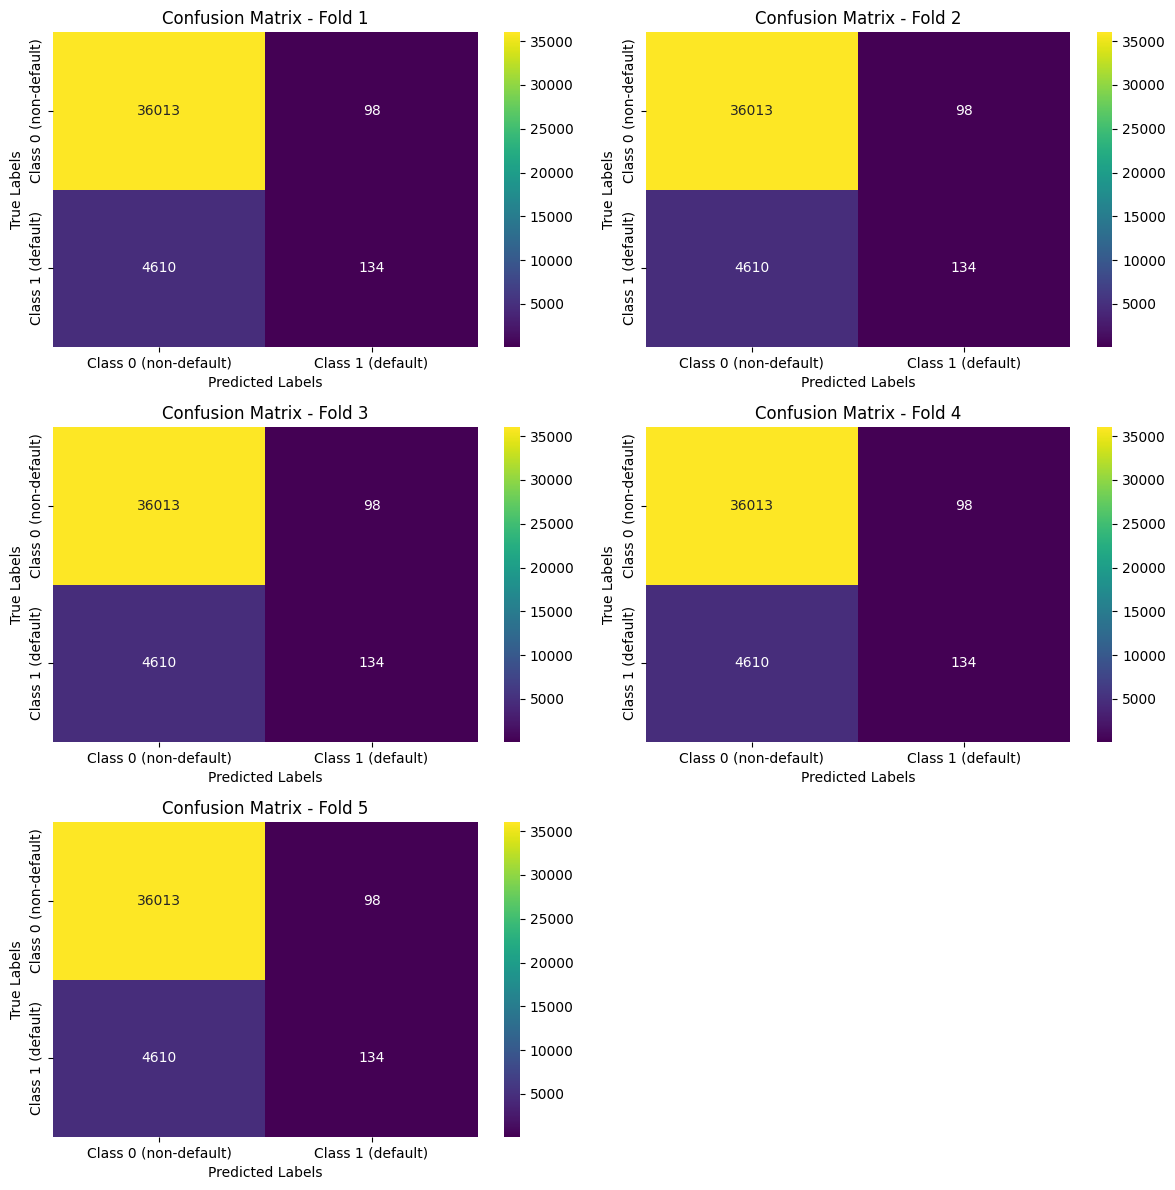

In [32]:
# Initialize a figure to hold multiple subplots
n_folds = len(accuracy_class_0)  # The number of folds
rows, cols = 3, 2  # Forming a 3x2 grid of subplots

# Ensure the number of subplots matches the number of folds
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over each fold to compute and plot the confusion matrix
for i, (train_idx, test_idx) in enumerate(outer_cv.split(X_train_sc, y_train)):
    if i>= n_folds:
        break  # Leaves the last subplot empty

    # Compute the confusion matrix for this fold
    cm = confusion_matrix(y_test_fold, y_test_pred_fold)
    
    # Plot the confusion matrix for the current fold
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0 (non-default)', 'Class 1 (default)'], yticklabels=['Class 0 (non-default)', 'Class 1 (default)'], ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Confusion Matrix - Fold {i+1}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Remove any unused subplots
for i in range(n_folds, len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


---

#### 7.2.3 Feature Coeffiicients Visualization across all folds

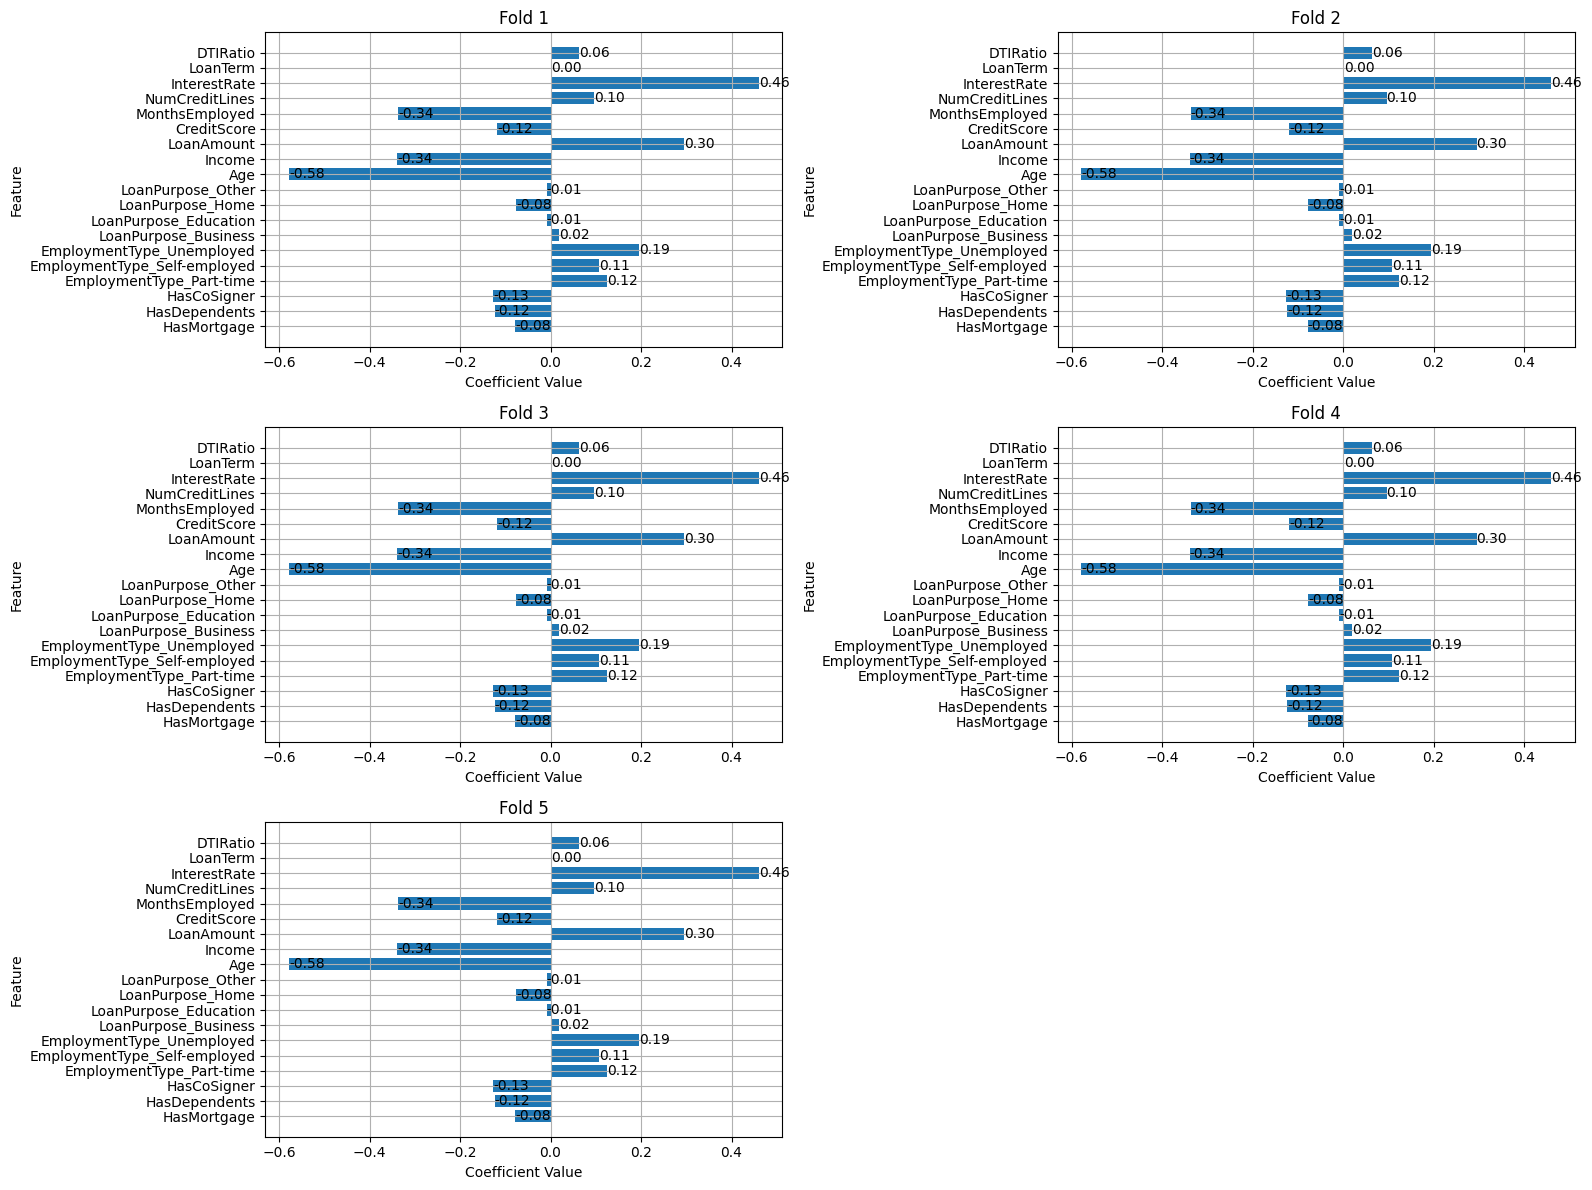

In [33]:
# Initialize the figure for plotting (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# We will store the coefficients across folds
coefficients = []

# Iterate over each fold in the outer cross-validation
for train_idx, test_idx in outer_cv.split(X_train_sc, y_train):
    # Get the coefficients (weights) from the trained model
    coef = A2.coef_[0]  # Get the coefficients for each feature
    coefficients.append(coef)

# Convert the list of coefficients into a numpy array for easy plotting
coefficients = np.array(coefficients)

# Create a list of feature names
feature_names = X_train.columns

# Flatten axes to loop over them easily
axes = axes.flatten()

# Plot the coefficients for each fold
for i, ax in enumerate(axes[:-1]):  # Leave the last plot empty
    ax.barh(feature_names, coefficients[i])
    
    # Add the coefficient labels to the bars
    for j, v in enumerate(coefficients[i]):
        ax.text(v, j, f'{v:.2f}', ha='left', va='center', color='black', fontsize=10)
    
    ax.set_title(f"Fold {i+1}")
    ax.set_xlabel('Coefficient Value')
    ax.set_ylabel('Feature')
    ax.grid(True)

# Set the last plot to be empty
axes[-1].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


---
---

<div class='alert alert-block alert-warning'>
<h1 style='font-size: 25px; font-weight: bold'>Task 8 - Conclusion and Future Work</h2>
</div>

#### 8.1 Summarize and Intepret the Achieved Results

<div class="alert alert-block alert-info">

In the pursuit to develop a classification model, the **A2 (Logistic Regression)** algorithm was applied to predict whether a customer would **default** on a loan (binary classification: Class 0 = non-default, Class 1 = default). The model's performance was evaluated using **outer cross-validation** across 5 folds, and was evaluated using **accuracy** and **F1-score** metrics.

* **Accuracy**: The model consistently achieved an average accuracy of **~88.5%** across all folds, which indicates a relatively high level of predictive performance which can be seen from viz. **7.2.1**.

* **F1-Score**: As can be observed from viz. **7.2.1**, The F1-score for **Class 0 (non-default)** was significantly higher **(~0.94)**, indicating the model is better at predicting non-defaults. On the other hand, the F1-score for **Class 1 (default)** was much lower **(~0.059)**. This suggests that the model has difficulty detecting defaults, which is a crucial limitation, especially when considering the goal of identifying high-risk borrowers. This is clearly evident from viz. **7.2.2**, which shows that the model is more likely to predict the true labels of non-defaults (Class 0) than defaults.

* **Feature Coefficients**: The relationship between the probability of a customer defaulting on a loan and the variables related to a customer's financial situation was analyzed and can be seen in viz. **7.2.3**. It can be seen that, across all folds, the model's predictions are heavily influenced by the **Interest Rate**, **Loan Amount**, and **Employment Type**, whereas the model shows a negative relationship with other features like Age, Income, Months Employed etc.

* **Analysis**: The model appears to be **biased** towards the majority class (Class 0). This can be attributed to the **class imbalance**, where non-default cases are more frequent than default cases. The model's tendency to predict the majority class results in poor performance for Class 1 (defaults), highlighting a potential issue in terms of predicting rare events. Moreover, the model seems to link the probability of defaulting with the **Interest Rate**, **Loan Amount**, and **Employment Type**, which is not surprising given the nature of the problem.

</div>

---

#### 8.2 Explain the Generated Value within the Context of Your Task

<div class="alert alert-block alert-info">

The analysis and evaluation of the **A2(Logistic Regression)** model have significant implications for the original task, which was to predict defaults in a loan dataset.

* **Business Implications**: The high performance in predicting non-defaults is useful for financial institutions, as it can help them confidently identify customers who are likely to repay their loans. However, the low performance in predicting defaults is a major concern, as identifying high-risk borrowers is equally critical for avoiding financial losses.

* **Model Performance in Context**: Although the model performs well in terms of overall accuracy, the low F1-score for defaults implies that it might fail to flag high-risk individuals (those who might default), thus failing to meet the primary goal of risk prediction.

</div>

---

#### 8.3 Propose Ideas for Future Work

<div class="alert alert-block alert-info">

To improve the final A2 model and address its limitations, here are a few ideas for future work:

1. **Handle Class Imbalance**:

    * **Resampling Techniques**: Apply oversampling (SMOTE) or undersampling methods to balance the classes and see if it improves the detection of Class 1 (defaults).

    * **Class Weights**: Adjust class weights in the logistic regression model (`class_weight='balanced'`) to give more importance to the minority class (defaults) during training.

2. **Feature Engineering**:

    * Explore **additional feature interactions** that might better capture the patterns associated with defaults.

    * Experiment with **feature selection** or **dimensionality reduction techniques** (e.g., PCA) to improve model performance and reduce overfitting.

3. **Evaluate with Different Metrics**:

     * Instead of relying solely on accuracy, consider using metrics such as **Precision-Recall AUC** or **ROC AUC**, which provide better insight into the performance with respect to rare events (Class 1).

    * Evaluate using **Precision**, **Recall**, and **Specificity** to better understand the trade-offs in detecting defaults.

</div>

---

#### 8.4 Critically Reflect and Assess the Usability of the Applied Methodology


<div class="alert alert-block alert-info">

The methodology applied in this project was primarily focused on using Logistic Regression for binary classification with cross-validation for model evaluation. While this approach is commonly used, there are some aspects that could be critically assessed.

* **Limitations of Logistic Regression**: Logistic regression is a linear model, which might not be ideal for capturing complex, non-linear relationships in the data. In this case, it was particularly less effective at predicting defaults (Class 1).

* **Class Imbalance**: A major issue in this dataset was the imbalance between the classes (non-default vs. default). Logistic regression by default assumes equal class distribution, which can lead to a bias towards the majority class. 

* **Data Issues**: In hindsight, data preprocessing such as feature scaling, handling missing values, and encoding categorical variables could have been optimized more thoroughly. This might have improved model performance, especially given that Logistic Regression is sensitive to feature scaling.
</div>

---
---